In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 数据处理

In [5]:
data = pd.read_csv('./data/season_avg.csv')
data.head()

,code,name,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,...,开盘_std,收盘_std,最高_std,最低_std,成交量_std,成交额_std,振幅_std,涨跌幅_std,涨跌额_std,换手率_std
0,1,平安银行,3247.210847,3249.201356,3262.351186,3232.169492,2.882718e+08,3.666643e+11,0.929661,0.099831,...,50.024770,46.931261,48.232348,46.801593,4.348687e+07,5.098375e+10,0.401123,0.685783,22.234898,0.095262
1,1,平安银行,3270.606271,3271.876102,3287.470000,3253.207966,3.334047e+08,4.303590e+11,1.045932,-0.034068,...,60.508973,60.290980,60.787482,59.188068,6.363939e+07,7.128055e+10,0.424841,0.778553,25.621803,0.139401
2,1,平安银行,3176.629844,3174.155938,3191.473125,3159.356094,2.948028e+08,3.384372e+11,1.013437,-0.042344,...,59.641475,61.839289,59.697602,60.398803,6.490671e+07,6.082434e+10,0.571676,0.789649,25.048705,0.141946
3,1,平安银行,3042.068250,3040.347250,3052.059750,3026.733250,2.917264e+08,3.450582e+11,0.833750,-0.061500,...,38.691116,36.468585,34.763626,38.782926,2.872781e+07,3.846384e+10,0.292423,0.630183,19.141201,0.063062
4,2,万 科Ａ,3403.747627,3405.830169,3419.624576,3387.967119,2.879763e+08,3.663495e+11,0.930508,0.100000,...,52.412794,49.172519,50.539039,49.034584,4.346395e+07,5.093922e+10,0.401198,0.686402,23.319064,0.095945


In [8]:
# 缺失值，空值处理
data = data.dropna()
data = data.drop_duplicates()

In [9]:
data.isnull().sum(), data.duplicated().sum()

(code       0
 name       0
 开盘         0
 收盘         0
 最高         0
 最低         0
 成交量        0
 成交额        0
 振幅         0
 涨跌幅        0
 涨跌额        0
 换手率        0
 开盘_std     0
 收盘_std     0
 最高_std     0
 最低_std     0
 成交量_std    0
 成交额_std    0
 振幅_std     0
 涨跌幅_std    0
 涨跌额_std    0
 换手率_std    0
 dtype: int64,
 0)

In [10]:
data.to_csv('./data/season_avg_clean.csv', index=False)

In [2]:
data = pd.read_csv('./data/season_avg_clean.csv')
data.head()

,code,name,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,...,开盘_std,收盘_std,最高_std,最低_std,成交量_std,成交额_std,振幅_std,涨跌幅_std,涨跌额_std,换手率_std
0,1,平安银行,3247.210847,3249.201356,3262.351186,3232.169492,2.882718e+08,3.666643e+11,0.929661,0.099831,...,50.024770,46.931261,48.232348,46.801593,4.348687e+07,5.098375e+10,0.401123,0.685783,22.234898,0.095262
1,1,平安银行,3270.606271,3271.876102,3287.470000,3253.207966,3.334047e+08,4.303590e+11,1.045932,-0.034068,...,60.508973,60.290980,60.787482,59.188068,6.363939e+07,7.128055e+10,0.424841,0.778553,25.621803,0.139401
2,1,平安银行,3176.629844,3174.155938,3191.473125,3159.356094,2.948028e+08,3.384372e+11,1.013437,-0.042344,...,59.641475,61.839289,59.697602,60.398803,6.490671e+07,6.082434e+10,0.571676,0.789649,25.048705,0.141946
3,1,平安银行,3042.068250,3040.347250,3052.059750,3026.733250,2.917264e+08,3.450582e+11,0.833750,-0.061500,...,38.691116,36.468585,34.763626,38.782926,2.872781e+07,3.846384e+10,0.292423,0.630183,19.141201,0.063062
4,2,万 科Ａ,3403.747627,3405.830169,3419.624576,3387.967119,2.879763e+08,3.663495e+11,0.930508,0.100000,...,52.412794,49.172519,50.539039,49.034584,4.346395e+07,5.093922e+10,0.401198,0.686402,23.319064,0.095945


In [3]:
# K均值聚类
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data_proc = data[['涨跌幅', '振幅']]
data_proc.head()


,涨跌幅,振幅
0,0.099831,0.929661
1,-0.034068,1.045932
2,-0.042344,1.013437
3,-0.061500,0.833750
4,0.100000,0.930508


d:\Environment\miniconda3\envs\da\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
d:\Environment\miniconda3\envs\da\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Environment\miniconda3\envs\da\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Environment\miniconda3\envs\da\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(

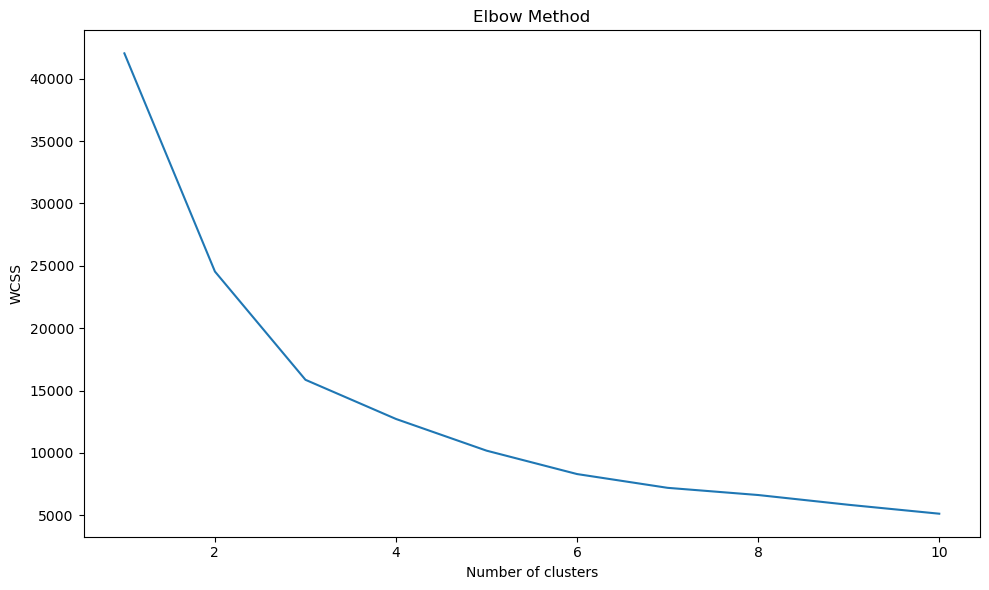

In [4]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_proc)
wcss = []
# KMeans算法，肘部图
plt.figure(figsize=(10, 6), dpi=100)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.tight_layout()
plt.show()

In [5]:
"""
设置聚类数量为5，random_state为0，
使得每次测试时的初始值一致
"""
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
pred_y = kmeans.fit_predict(data_scaled)
# 股票代码与数据
Fs = pd.Series(pred_y, index = [data['code'], data['name']])
Fs

d:\Environment\miniconda3\envs\da\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\weizi\AppData\Local\Temp\ipykernel_42308\446342880.py:8: DeprecationWarning: Series._data is deprecated and will be removed in a future version. Use public APIs instead.
  Fs = pd.Series(pred_y, index = [data['code'], data['name']])


code    name 
1       平安银行     4
        平安银行     4
        平安银行     4
        平安银行     4
2       万  科Ａ    4
                ..
873706  铁拓机械     4
        铁拓机械     2
873726  卓兆点胶     2
873833  美心翼申     4
        美心翼申     2
Length: 21017, dtype: int32

C:\Users\weizi\AppData\Local\Temp\ipykernel_42308\3264596067.py:13: UserWarning: Glyph 28072 (\N{CJK UNIFIED IDEOGRAPH-6DA8}) missing from current font.
  plt.tight_layout()
C:\Users\weizi\AppData\Local\Temp\ipykernel_42308\3264596067.py:13: UserWarning: Glyph 36300 (\N{CJK UNIFIED IDEOGRAPH-8DCC}) missing from current font.
  plt.tight_layout()
C:\Users\weizi\AppData\Local\Temp\ipykernel_42308\3264596067.py:13: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from current font.
  plt.tight_layout()
C:\Users\weizi\AppData\Local\Temp\ipykernel_42308\3264596067.py:13: UserWarning: Glyph 25391 (\N{CJK UNIFIED IDEOGRAPH-632F}) missing from current font.
  plt.tight_layout()
d:\Environment\miniconda3\envs\da\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25391 (\N{CJK UNIFIED IDEOGRAPH-632F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Environment\miniconda3\envs\da\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarni

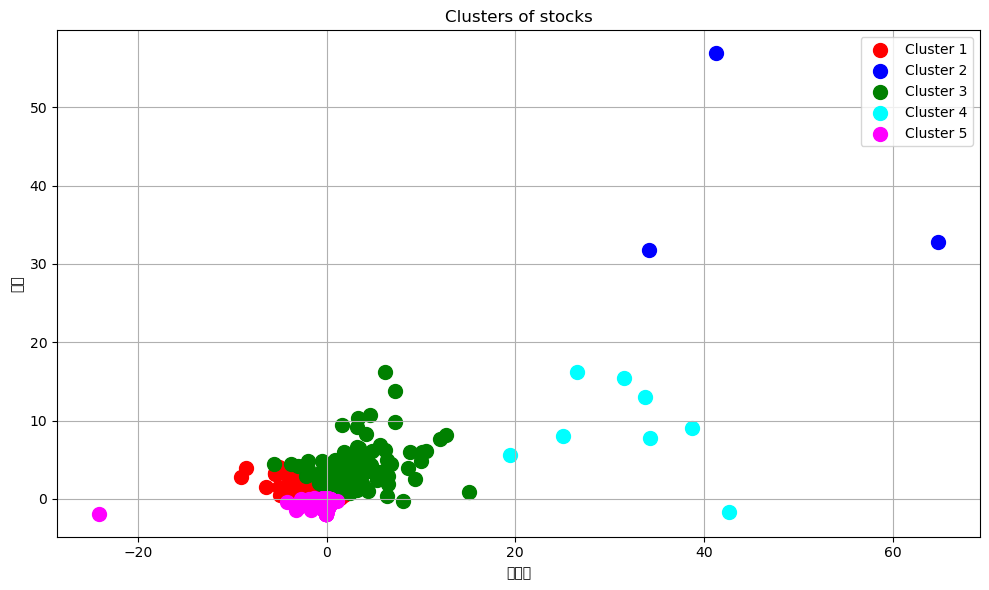

In [6]:
# 可视化聚类
plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(data_scaled[pred_y == 0, 0], data_scaled[pred_y == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data_scaled[pred_y == 1, 0], data_scaled[pred_y == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data_scaled[pred_y == 2, 0], data_scaled[pred_y == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(data_scaled[pred_y == 3, 0], data_scaled[pred_y == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(data_scaled[pred_y == 4, 0], data_scaled[pred_y == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.title('Clusters of stocks')
plt.xlabel('涨跌幅')
plt.ylabel('振幅')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [7]:
# 分析每个簇特质
for i in range(5):
    print('Cluster', i+1)
    print(data_proc[pred_y == i].describe())

Cluster 1
               涨跌幅           振幅
count  7616.000000  7616.000000
mean      0.086213     4.168528
std       0.476324     0.705799
min     -10.045000     3.104182
25%      -0.119364     3.598814
50%       0.109264     4.014531
75%       0.317839     4.592639
max       2.225500    10.397586
Cluster 2
             涨跌幅          振幅
count   3.000000    3.000000
mean   52.174082   74.059113
std    17.883253   24.895788
min    38.108462   58.809231
25%    42.111123   59.694615
50%    46.113784   60.580000
75%    59.206892   81.684054
max    72.300000  102.788108
Cluster 3
               涨跌幅           振幅
count  1047.000000  1047.000000
mean      1.103831     7.353012
std       1.603671     2.115637
min      -6.093333     2.740000
25%       0.434068     6.191017
50%       0.784068     6.822000
75%       1.268625     7.739500
max      16.960000    31.628649
Cluster 4
             涨跌幅         振幅
count   8.000000   8.000000
mean   35.181696  19.361488
std     8.432475  10.167443
min    21.7

In [12]:
data.head()

,code,name,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,...,开盘_std,收盘_std,最高_std,最低_std,成交量_std,成交额_std,振幅_std,涨跌幅_std,涨跌额_std,换手率_std
0,1,平安银行,3247.210847,3249.201356,3262.351186,3232.169492,2.882718e+08,3.666643e+11,0.929661,0.099831,...,50.024770,46.931261,48.232348,46.801593,4.348687e+07,5.098375e+10,0.401123,0.685783,22.234898,0.095262
1,1,平安银行,3270.606271,3271.876102,3287.470000,3253.207966,3.334047e+08,4.303590e+11,1.045932,-0.034068,...,60.508973,60.290980,60.787482,59.188068,6.363939e+07,7.128055e+10,0.424841,0.778553,25.621803,0.139401
2,1,平安银行,3176.629844,3174.155938,3191.473125,3159.356094,2.948028e+08,3.384372e+11,1.013437,-0.042344,...,59.641475,61.839289,59.697602,60.398803,6.490671e+07,6.082434e+10,0.571676,0.789649,25.048705,0.141946
3,1,平安银行,3042.068250,3040.347250,3052.059750,3026.733250,2.917264e+08,3.450582e+11,0.833750,-0.061500,...,38.691116,36.468585,34.763626,38.782926,2.872781e+07,3.846384e+10,0.292423,0.630183,19.141201,0.063062
4,2,万 科Ａ,3403.747627,3405.830169,3419.624576,3387.967119,2.879763e+08,3.663495e+11,0.930508,0.100000,...,52.412794,49.172519,50.539039,49.034584,4.346395e+07,5.093922e+10,0.401198,0.686402,23.319064,0.095945
